# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Abdullah Edik
## Student ID: 2220765031

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
healthcare_df = pd.read_csv('data.csv')
healthcare_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
healthcare_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
healthcare_df[healthcare_df['Unnamed: 32'].notna() ]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [5]:
healthcare_df = healthcare_df.drop(columns=['Unnamed: 32'])

In [6]:
healthcare_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

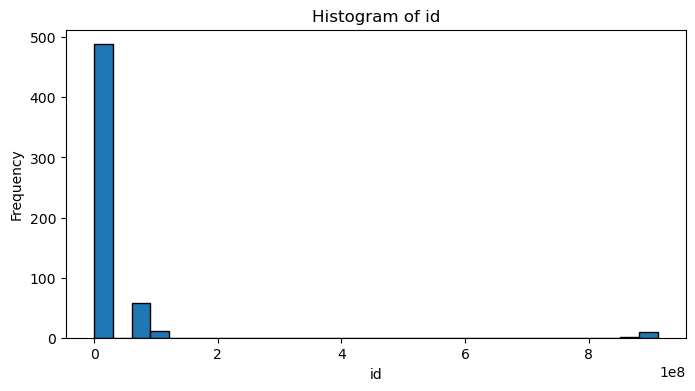

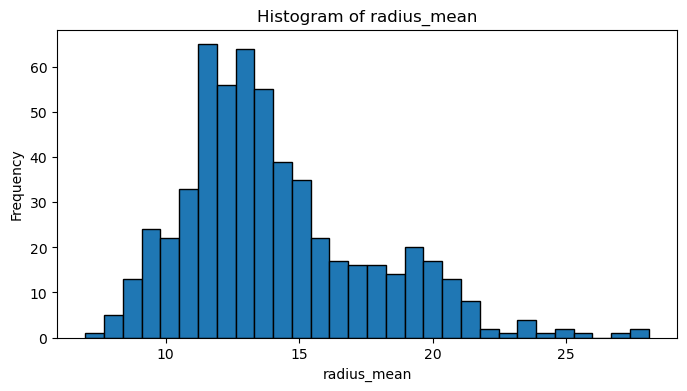

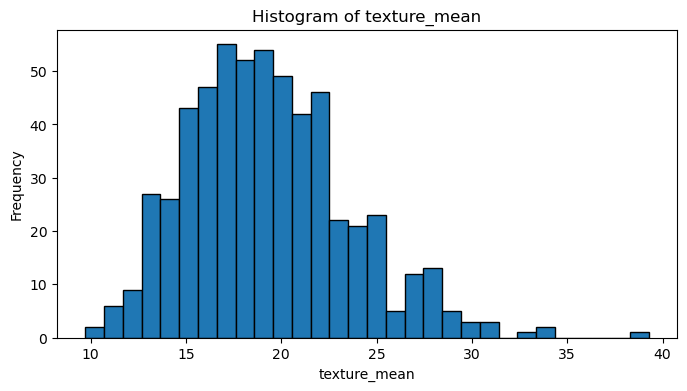

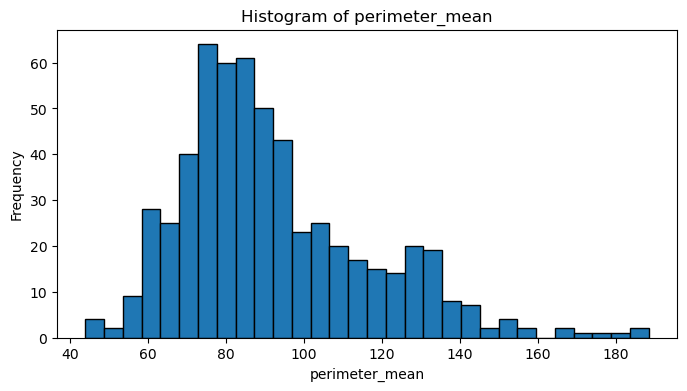

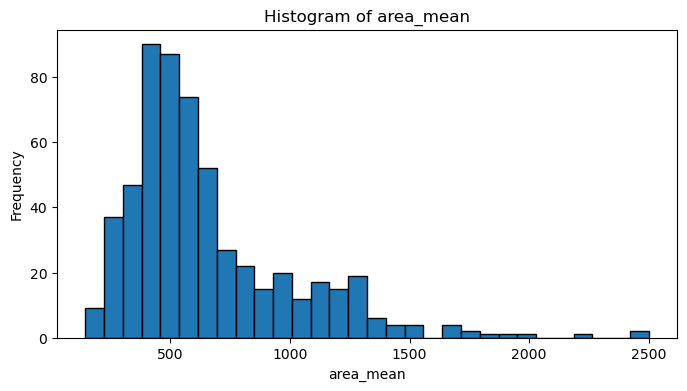

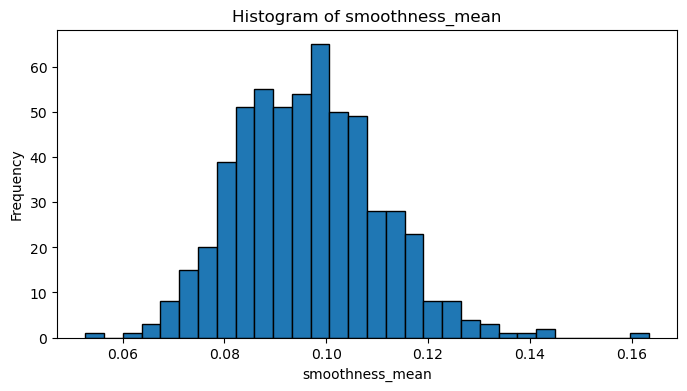

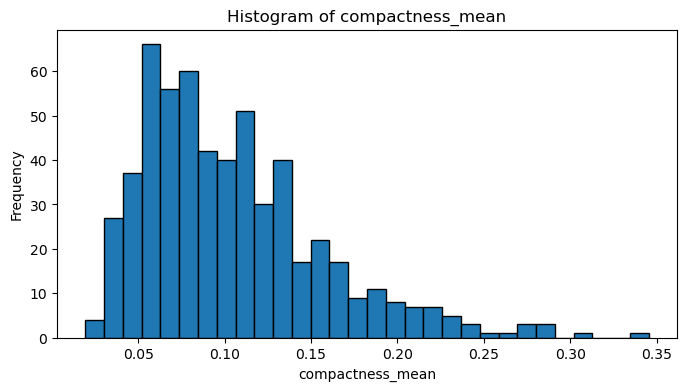

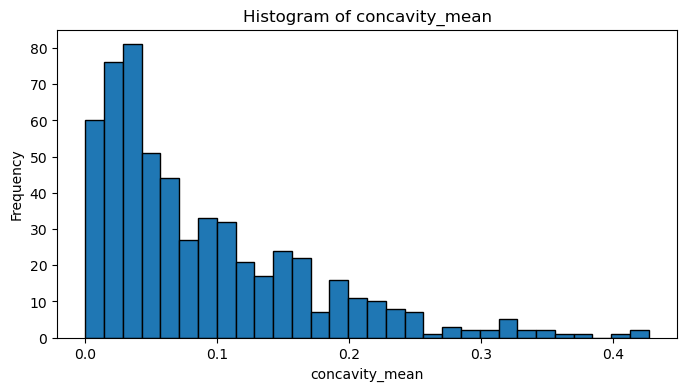

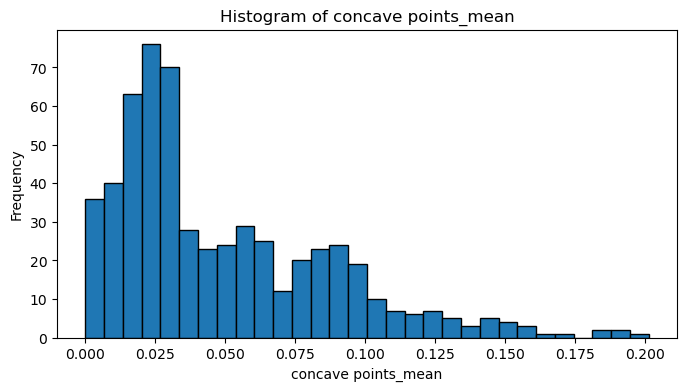

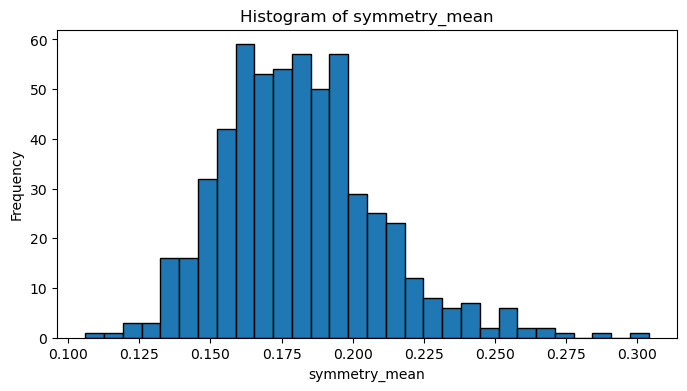

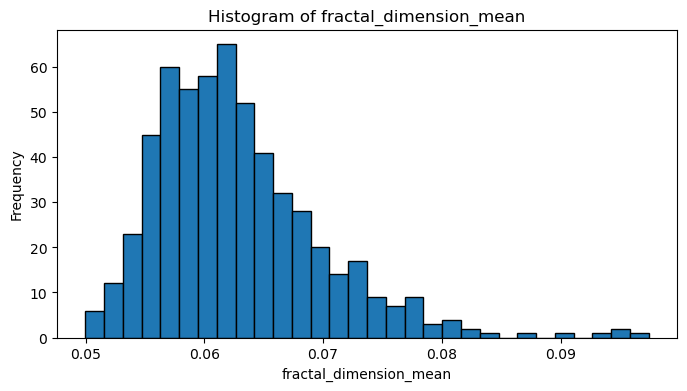

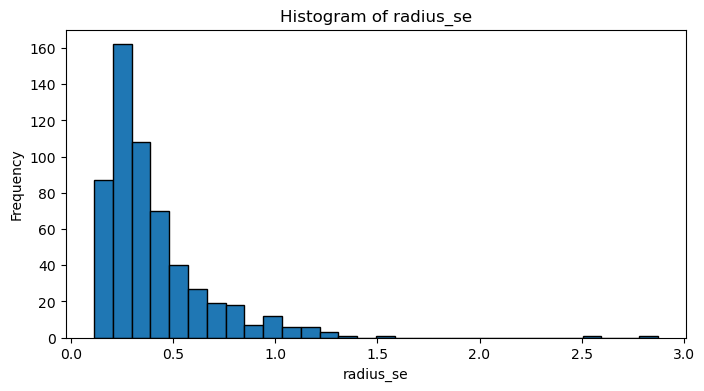

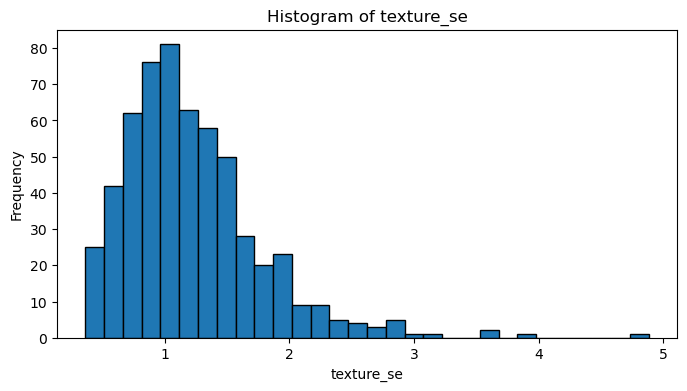

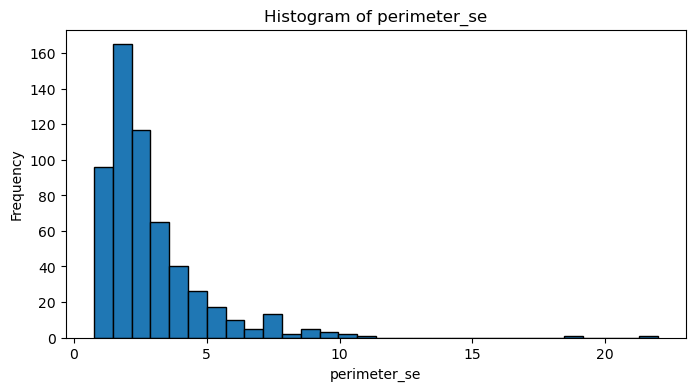

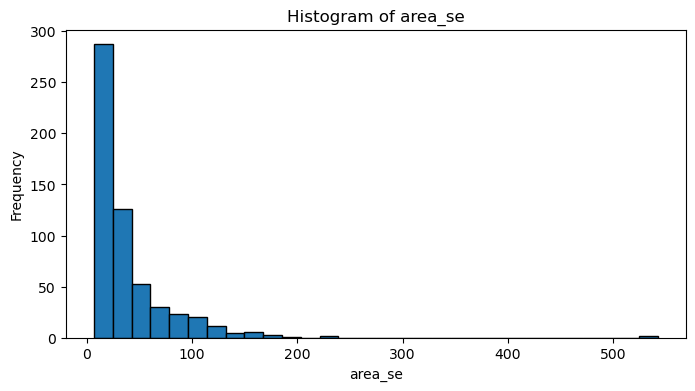

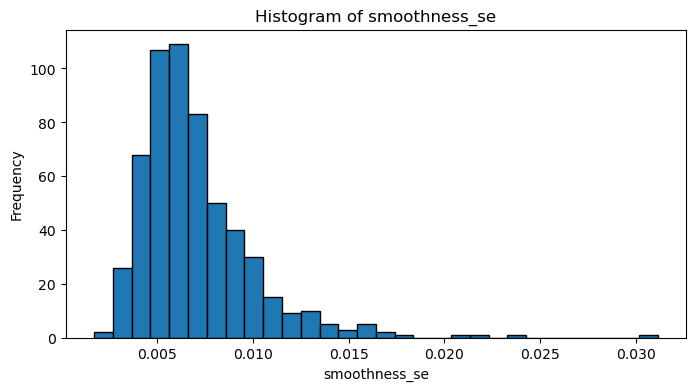

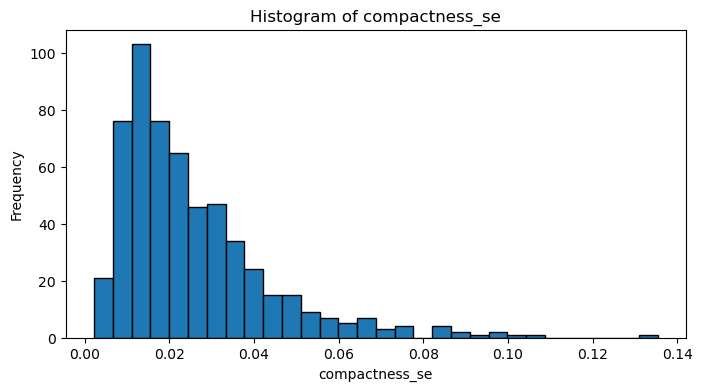

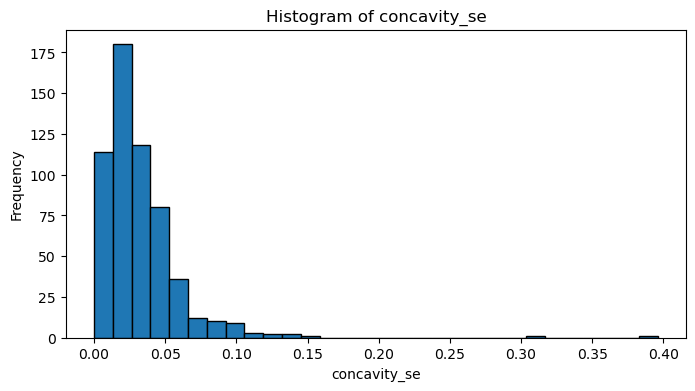

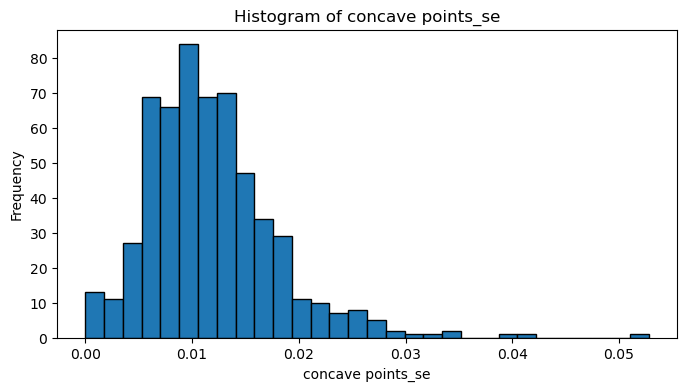

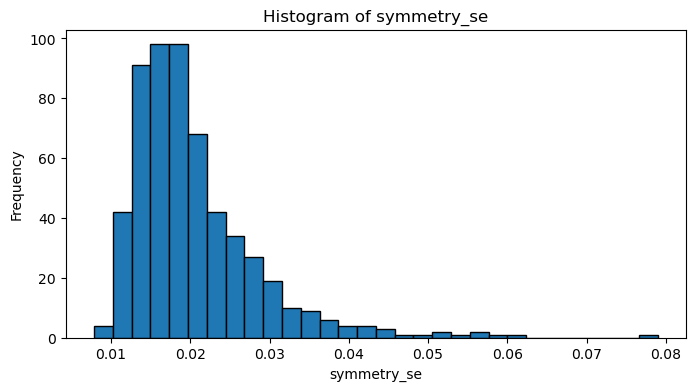

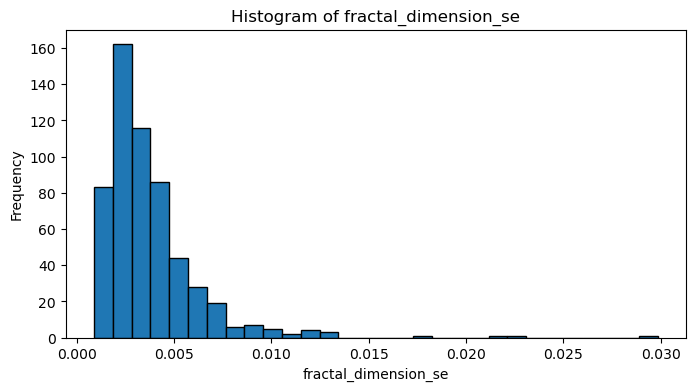

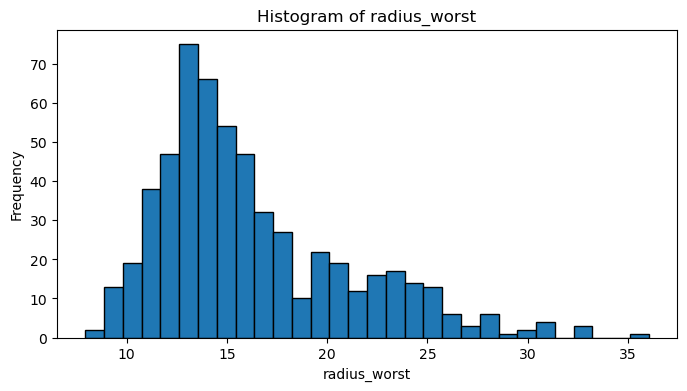

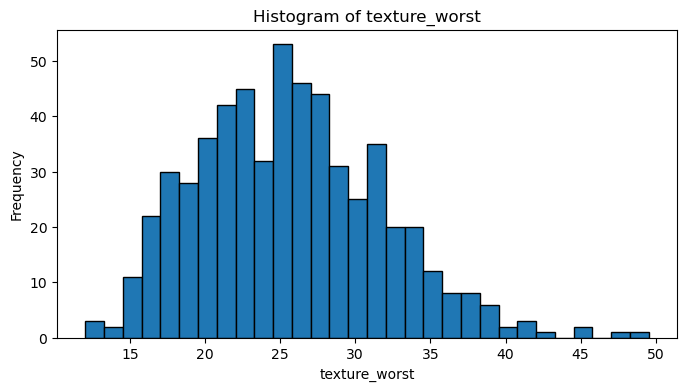

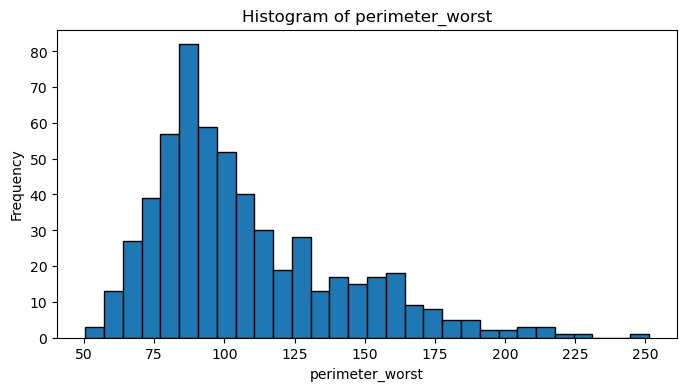

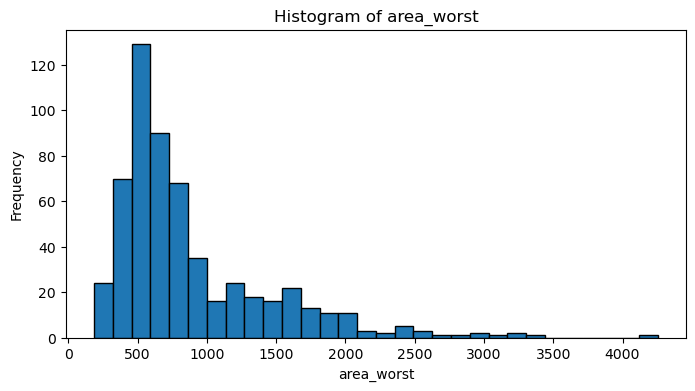

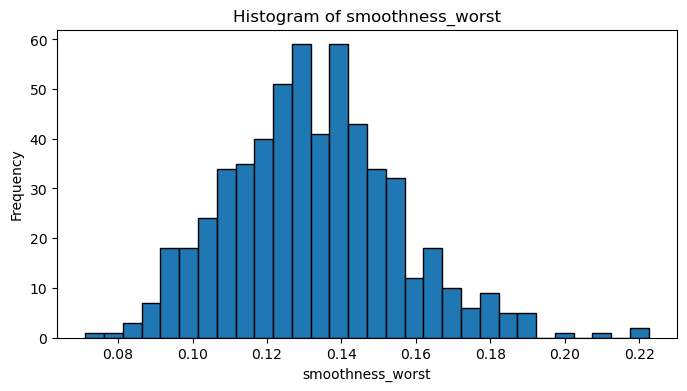

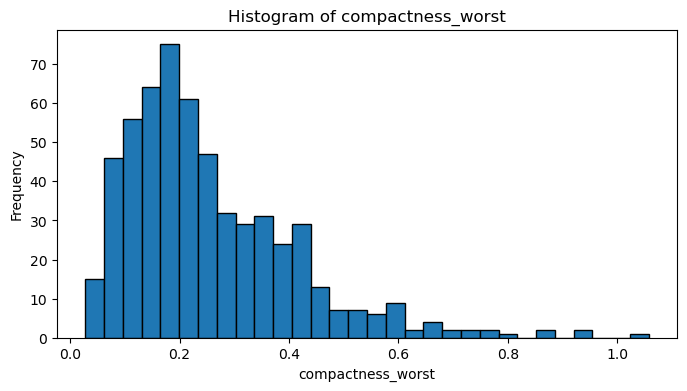

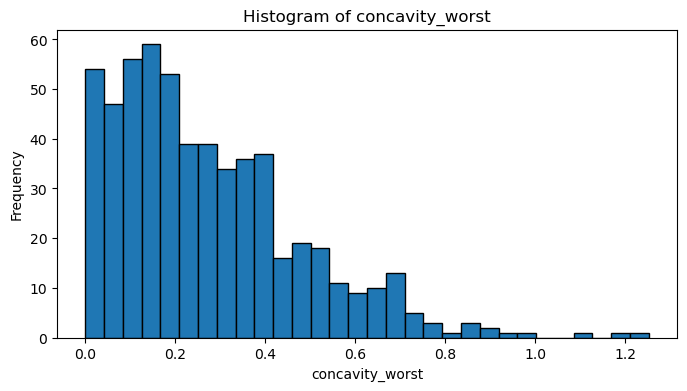

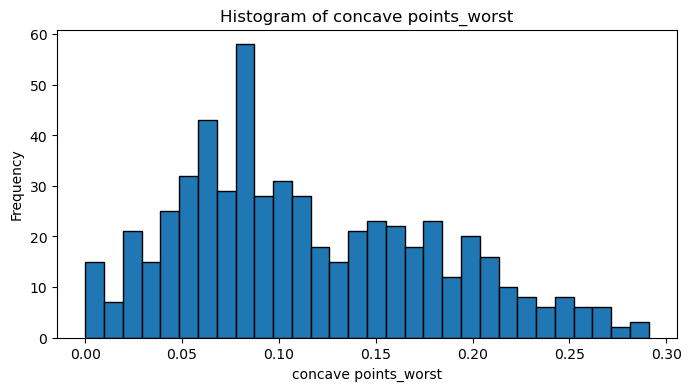

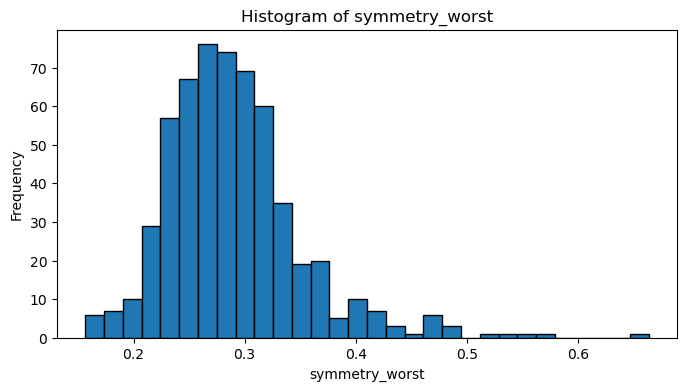

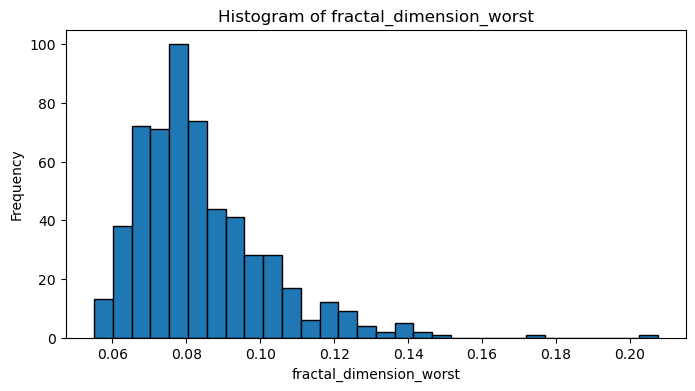

In [7]:
columns_to_visualize = healthcare_df.columns.drop('diagnosis')
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    
    plt.hist(healthcare_df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

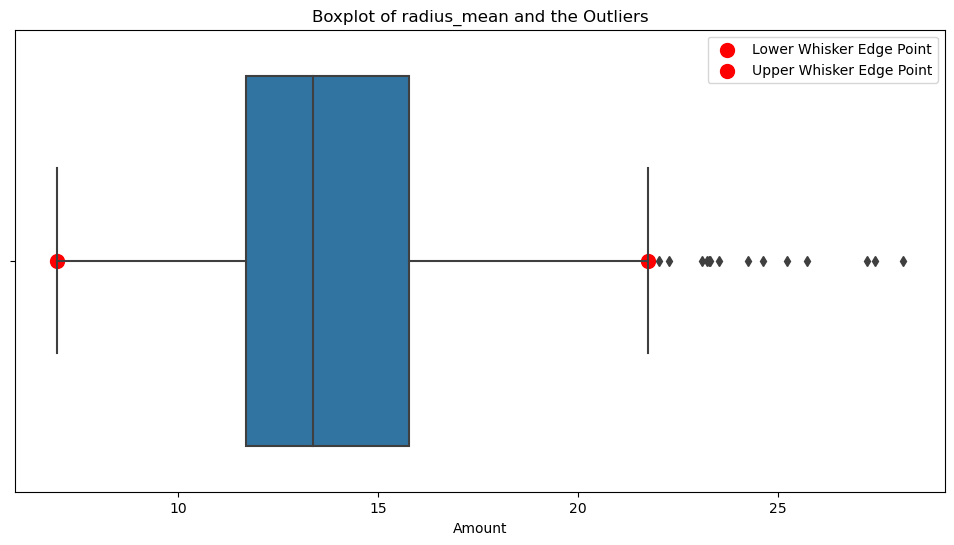

82     25.22
108    22.27
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
369    22.01
461    27.42
503    23.09
521    24.63
Name: radius_mean, dtype: float64


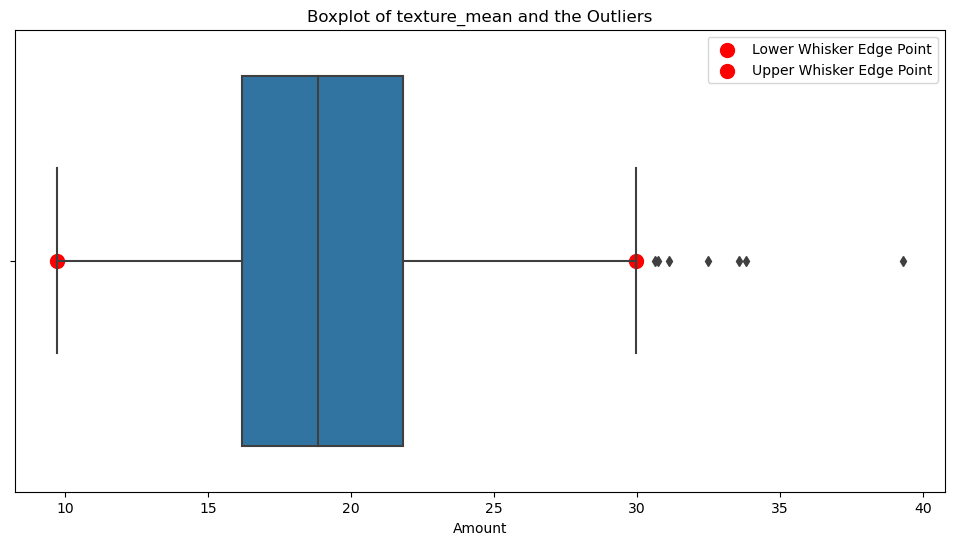

219    32.47
232    33.81
239    39.28
259    33.56
265    31.12
455    30.72
562    30.62
Name: texture_mean, dtype: float64


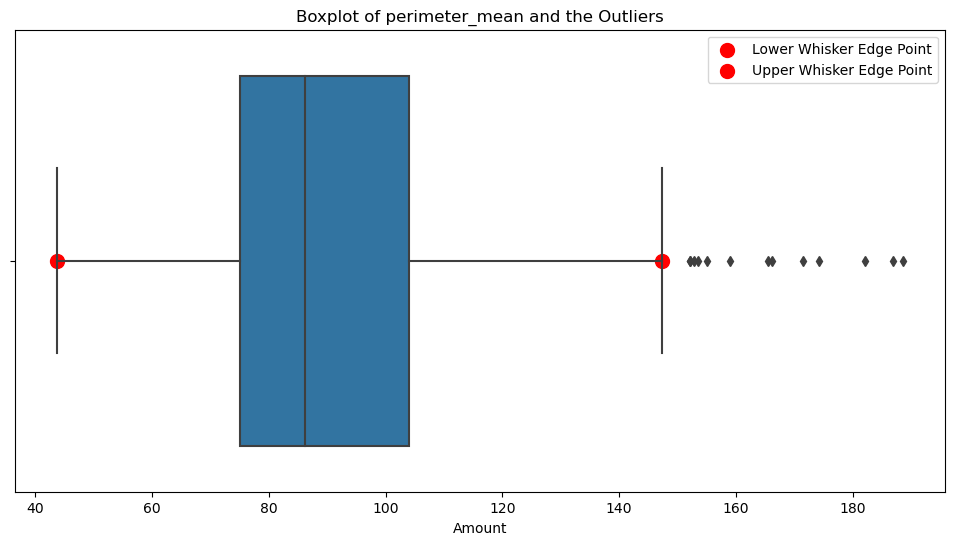

82     171.5
108    152.8
122    166.2
164    152.1
180    182.1
202    158.9
212    188.5
236    153.5
339    155.1
352    174.2
461    186.9
503    152.1
521    165.5
Name: perimeter_mean, dtype: float64


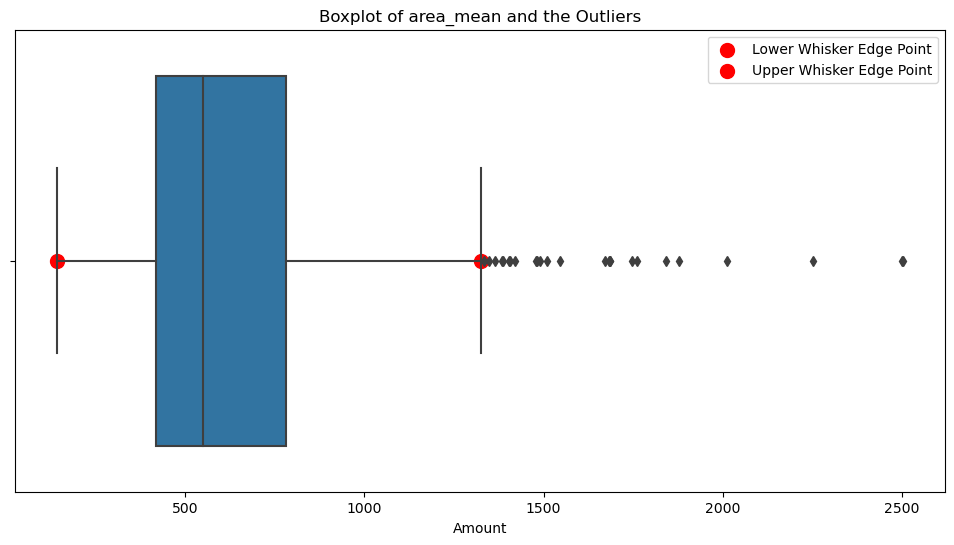

23     1404.0
82     1878.0
108    1509.0
122    1761.0
164    1686.0
180    2250.0
202    1685.0
212    2499.0
236    1670.0
250    1364.0
265    1419.0
272    1491.0
339    1747.0
352    2010.0
368    1546.0
369    1482.0
372    1386.0
373    1335.0
393    1407.0
449    1384.0
461    2501.0
503    1682.0
521    1841.0
563    1347.0
564    1479.0
Name: area_mean, dtype: float64


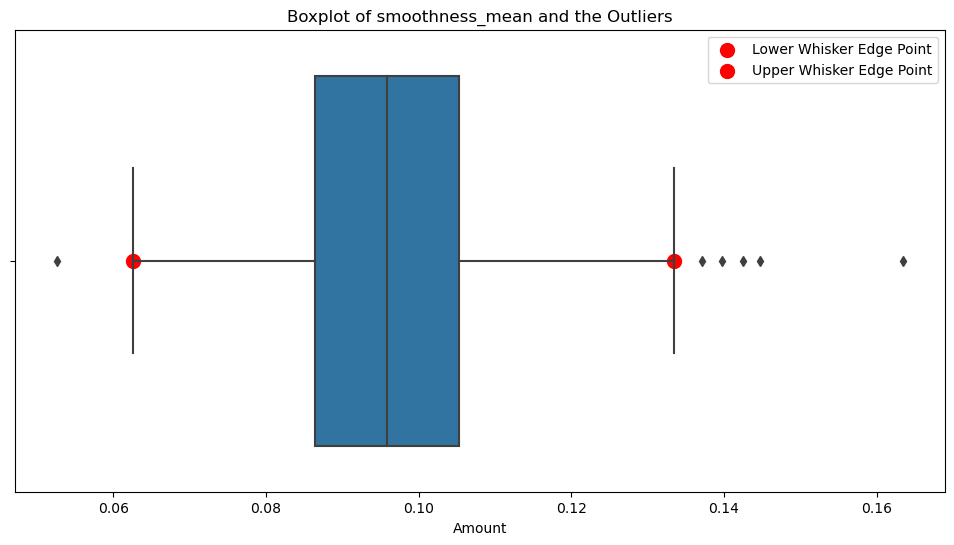

3      0.14250
105    0.13980
122    0.14470
504    0.16340
520    0.13710
568    0.05263
Name: smoothness_mean, dtype: float64


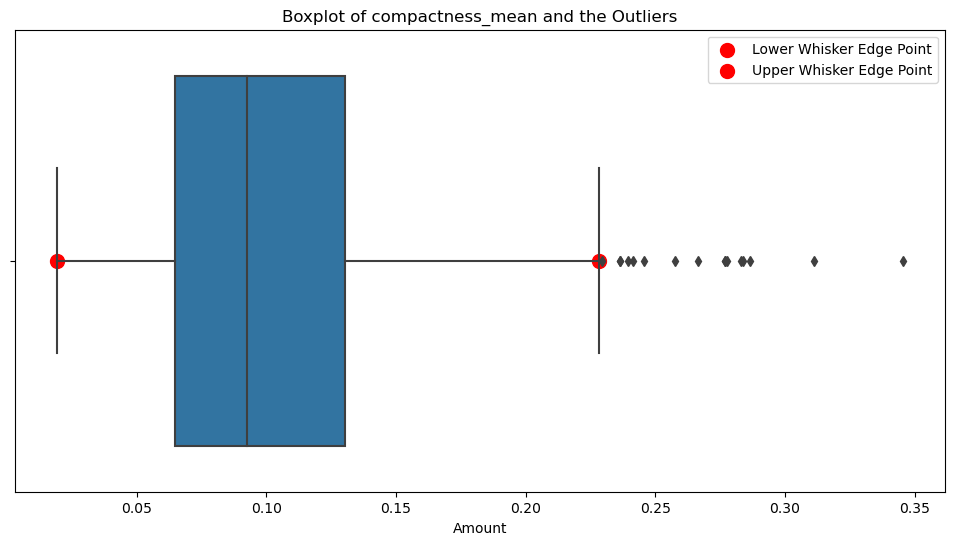

0      0.2776
3      0.2839
9      0.2396
12     0.2458
14     0.2293
78     0.3454
82     0.2665
108    0.2768
122    0.2867
181    0.2832
190    0.2413
258    0.3114
351    0.2364
352    0.2363
400    0.2576
567    0.2770
Name: compactness_mean, dtype: float64


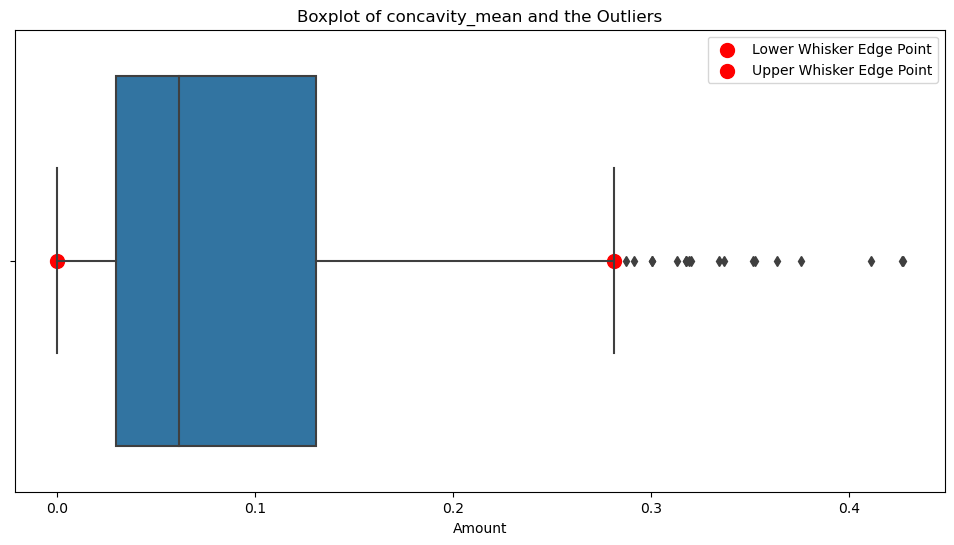

0      0.3001
68     0.3130
78     0.3754
82     0.3339
108    0.4264
112    0.3003
122    0.4268
152    0.4108
180    0.2871
202    0.3523
212    0.3201
258    0.3176
351    0.2914
352    0.3368
400    0.3189
461    0.3635
563    0.3174
567    0.3514
Name: concavity_mean, dtype: float64


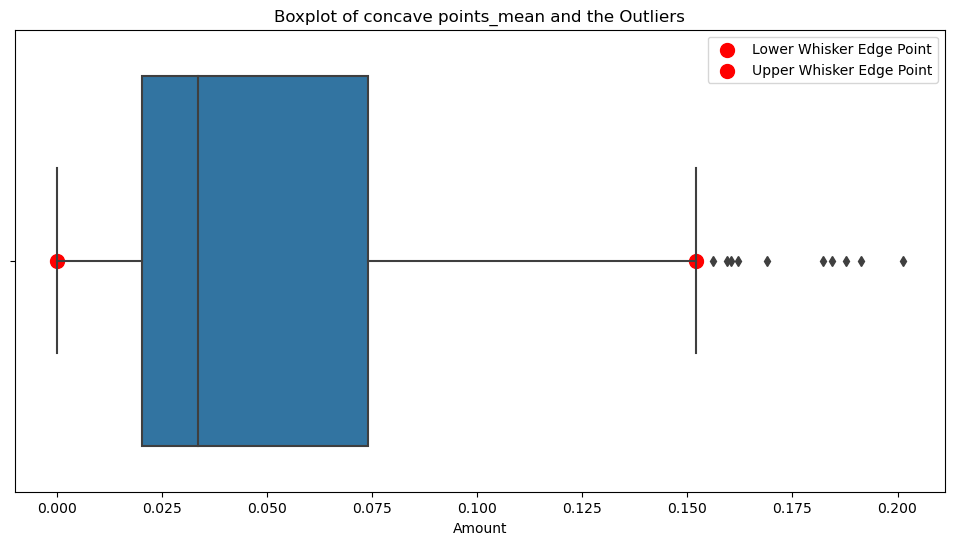

78     0.1604
82     0.1845
108    0.1823
122    0.2012
180    0.1878
202    0.1620
212    0.1595
352    0.1913
393    0.1562
461    0.1689
Name: concave points_mean, dtype: float64


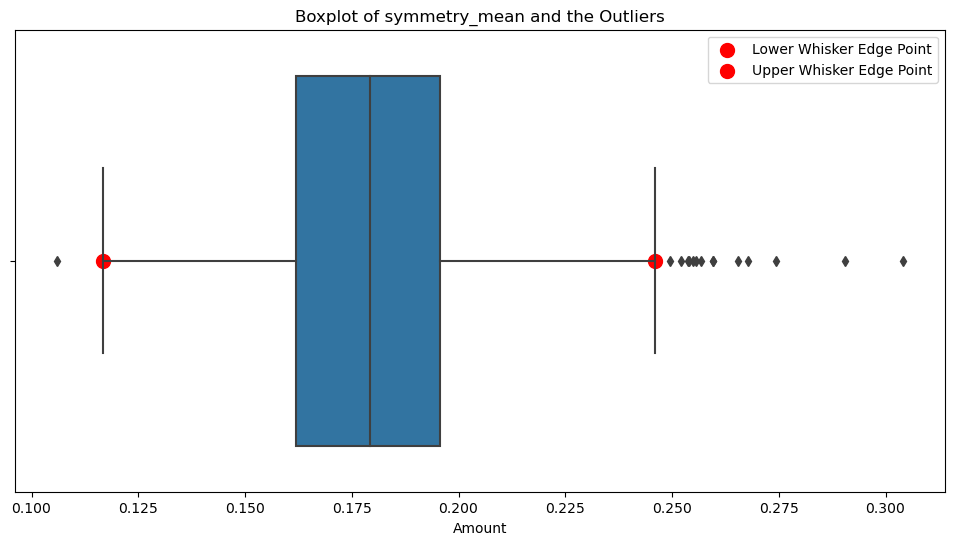

3      0.2597
22     0.2521
25     0.3040
60     0.2743
78     0.2906
108    0.2556
122    0.2655
146    0.2678
150    0.2540
152    0.2548
258    0.2495
288    0.2595
323    0.2569
424    0.2538
561    0.1060
Name: symmetry_mean, dtype: float64


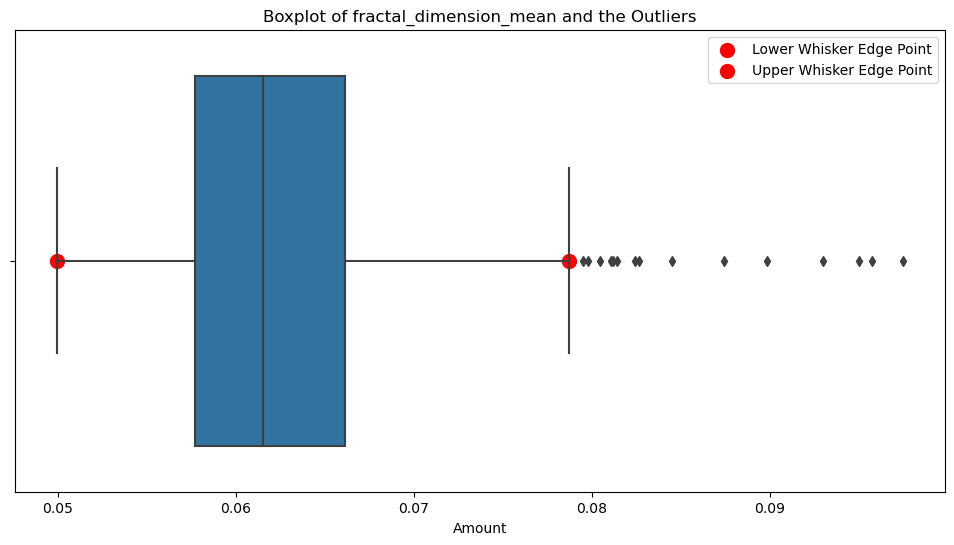

3      0.09744
9      0.08243
68     0.08046
71     0.08980
78     0.08142
151    0.08261
152    0.09296
176    0.08116
258    0.08104
318    0.08743
376    0.08450
379    0.07950
504    0.09502
505    0.09575
507    0.07976
Name: fractal_dimension_mean, dtype: float64


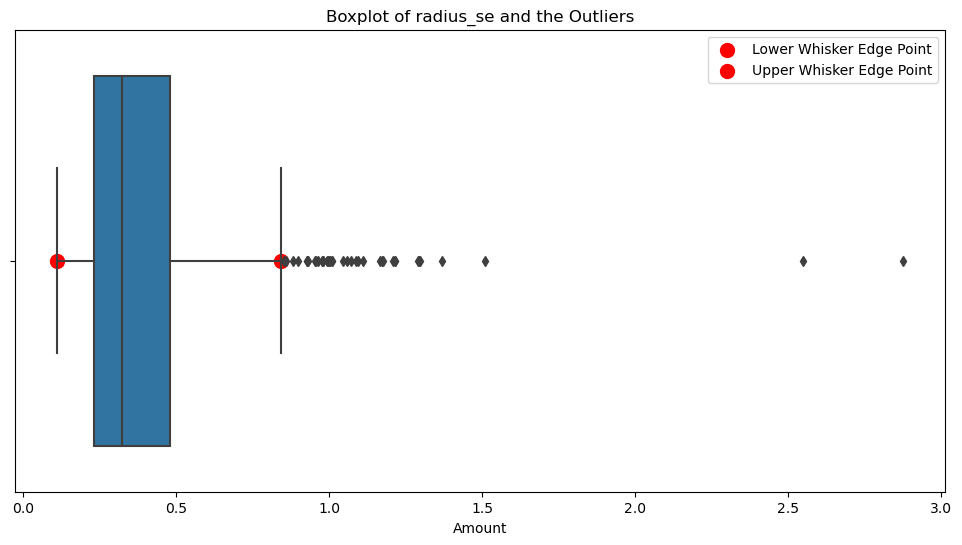

0      1.0950
12     0.9555
25     1.0460
27     0.8529
38     1.2140
42     0.9811
77     0.9806
78     0.9317
82     0.8973
108    1.2150
122    1.5090
138    1.2960
161    1.0000
168    1.0880
210    0.8601
212    2.8730
218    0.9553
236    1.0580
250    1.0040
258    1.2920
265    1.1720
272    1.1670
290    0.8811
300    1.1110
302    1.0720
339    1.0090
352    0.9948
366    0.9761
368    1.2070
369    1.0080
417    1.3700
460    0.9291
461    2.5470
468    0.9289
503    1.2910
521    0.9915
563    0.9622
564    1.1760
Name: radius_se, dtype: float64


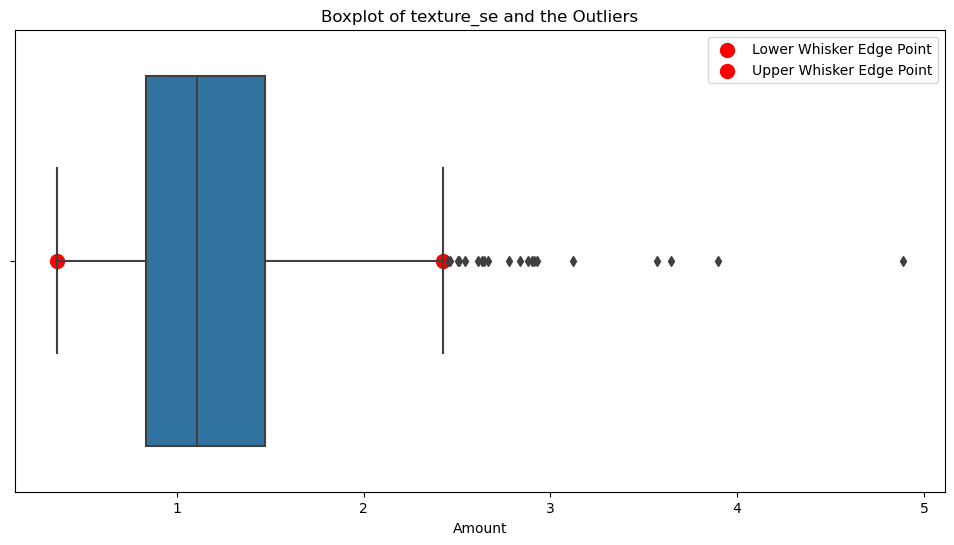

12     3.568
83     2.910
122    3.120
136    2.508
152    2.664
192    4.885
245    2.612
258    2.454
314    2.777
345    2.509
389    2.836
416    2.878
443    2.542
471    2.643
473    3.647
528    2.635
557    2.927
559    2.904
561    3.896
565    2.463
Name: texture_se, dtype: float64


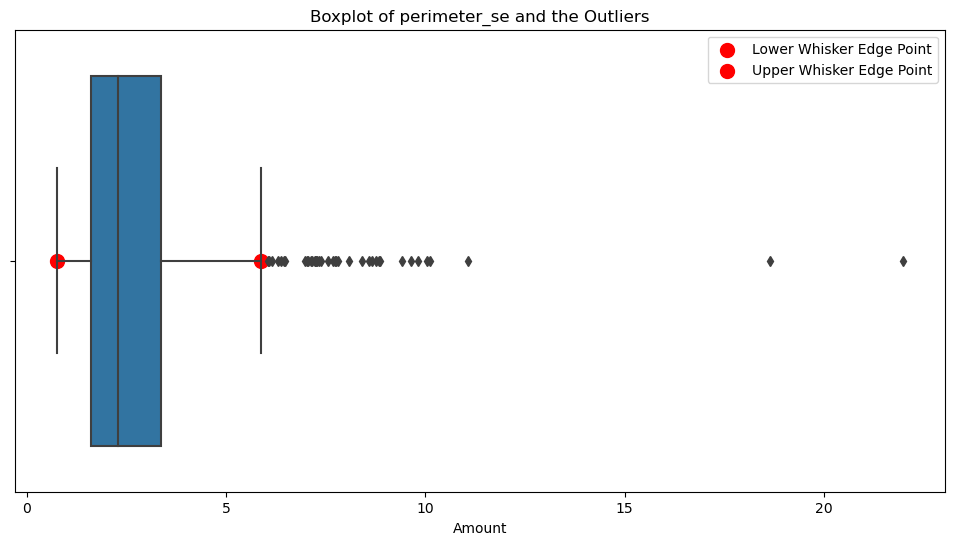

0       8.589
12     11.070
25      7.276
38      8.077
42      8.830
77      6.311
78      8.649
82      7.382
108    10.050
122     9.807
138     8.419
161     6.971
168     7.337
210     7.029
212    21.980
218     6.487
236     7.247
250     6.372
256     7.158
258    10.120
262     6.146
265     7.749
272     8.867
300     7.237
302     7.804
335     6.076
339     6.462
352     7.222
366     7.128
368     7.733
369     7.561
417     9.424
460     6.051
461    18.650
503     9.635
521     7.050
563     8.758
564     7.673
Name: perimeter_se, dtype: float64


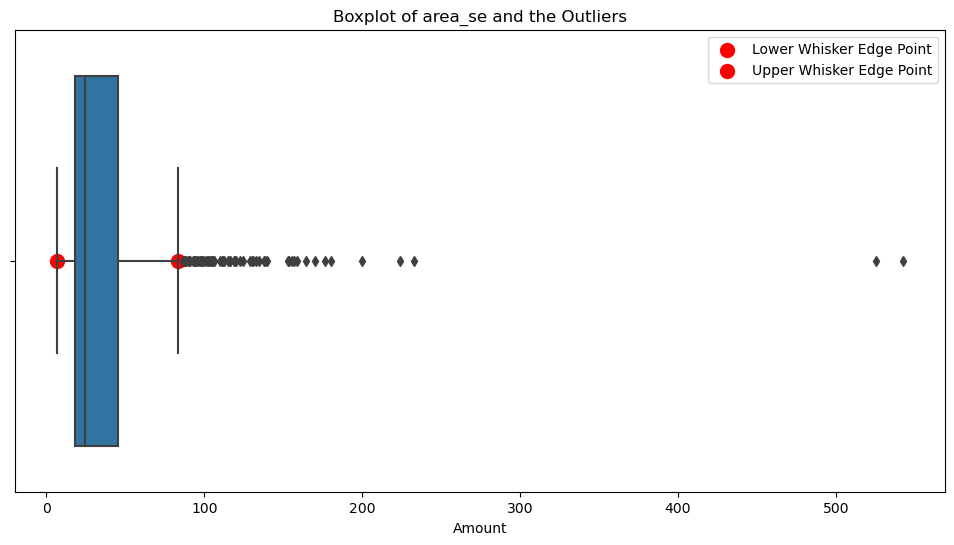

0      153.40
2       94.03
4       94.44
12     116.20
18     112.40
        ...  
535     87.78
563    118.80
564    158.70
565     99.04
567     86.22
Name: area_se, Length: 65, dtype: float64


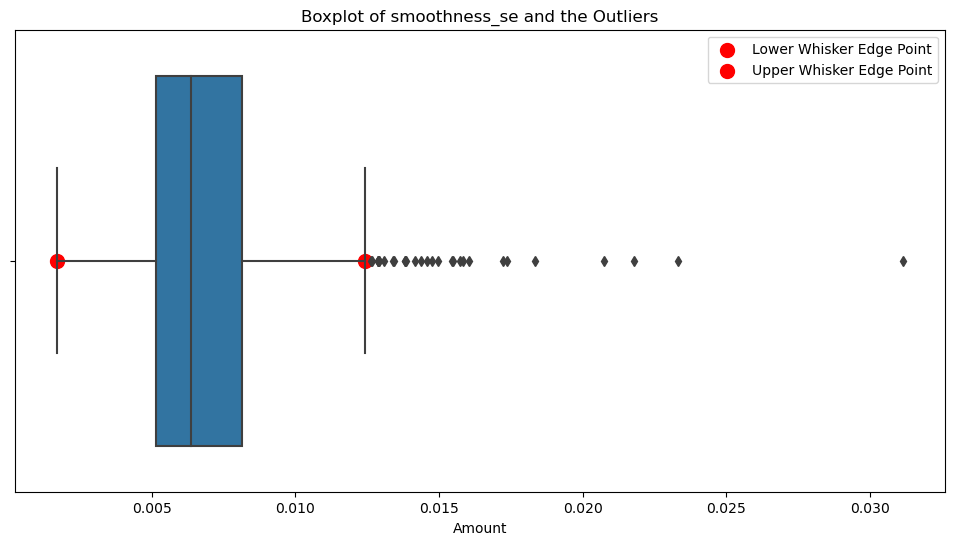

71     0.01721
76     0.01340
110    0.01385
111    0.01291
116    0.01835
122    0.02333
173    0.01496
176    0.01286
185    0.01439
196    0.01380
212    0.01345
213    0.03113
245    0.01604
273    0.01380
275    0.01418
288    0.01574
314    0.02075
332    0.01289
345    0.01736
391    0.01582
416    0.01474
424    0.01307
469    0.01459
505    0.02177
507    0.01262
520    0.01546
537    0.01288
538    0.01266
539    0.01547
556    0.01291
Name: smoothness_se, dtype: float64


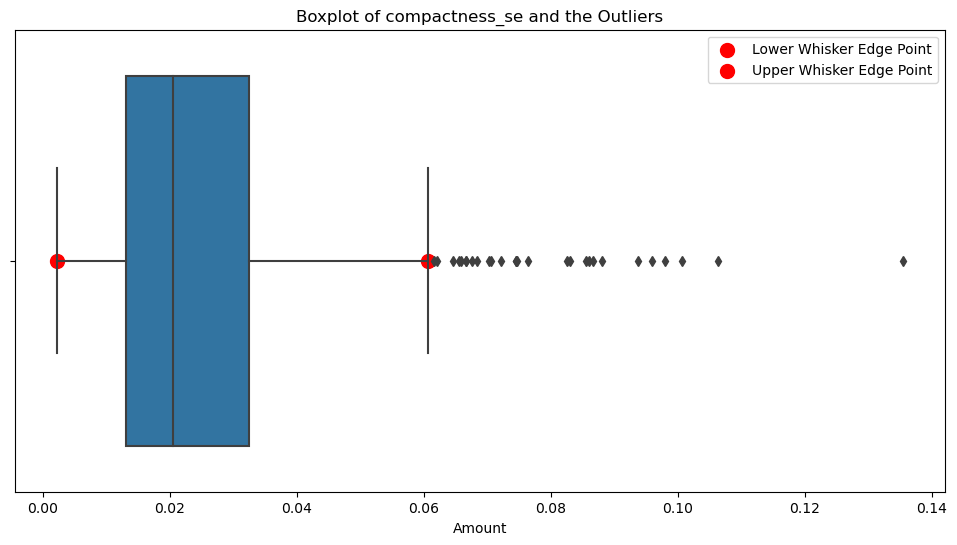

3      0.07458
9      0.07217
12     0.08297
42     0.10060
62     0.07056
68     0.08606
71     0.09368
78     0.06835
108    0.08668
112    0.07446
116    0.06760
122    0.09806
152    0.09586
176    0.08808
190    0.13540
213    0.08555
288    0.08262
290    0.10640
318    0.06590
351    0.06559
376    0.07643
388    0.06669
430    0.06213
465    0.06657
468    0.07025
485    0.07471
539    0.06457
567    0.06158
Name: compactness_se, dtype: float64


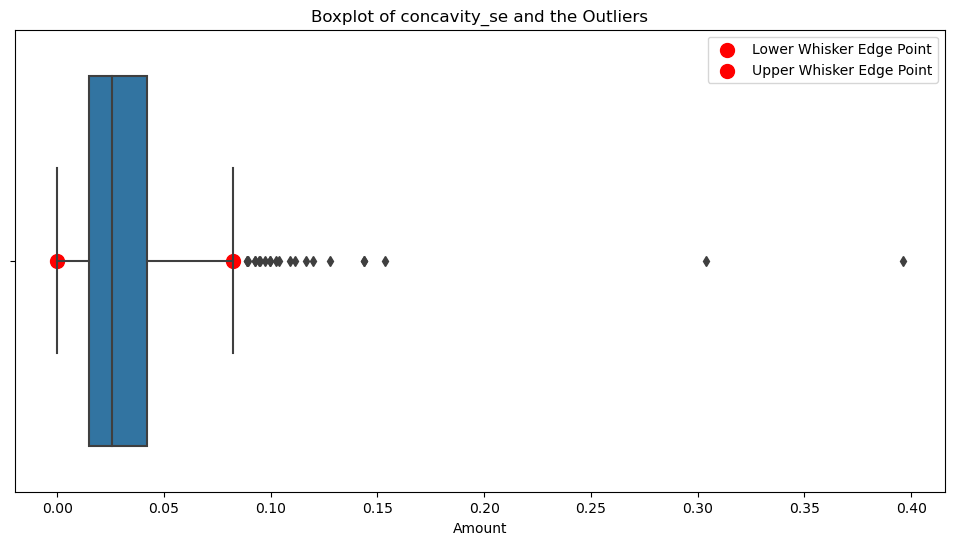

12     0.08890
42     0.09723
68     0.30380
78     0.10910
108    0.10400
112    0.14350
116    0.09263
122    0.12780
152    0.39600
176    0.11970
190    0.11660
202    0.08958
213    0.14380
242    0.08880
250    0.09518
290    0.09960
318    0.10270
351    0.09953
376    0.15350
388    0.09472
485    0.11140
539    0.09252
Name: concavity_se, dtype: float64


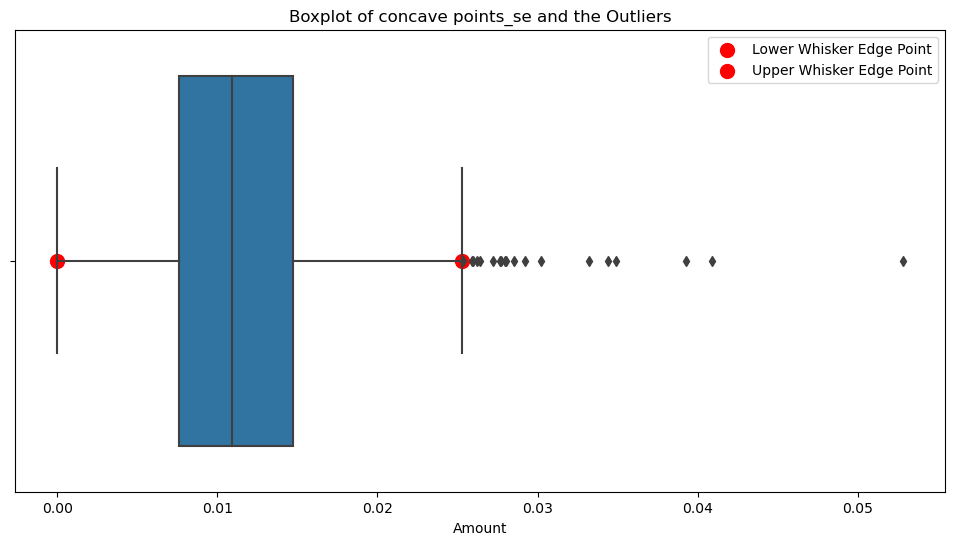

12     0.04090
42     0.02638
68     0.03322
78     0.02593
138    0.02801
152    0.05279
161    0.02794
210    0.02765
213    0.03927
258    0.03024
288    0.03487
290    0.02771
366    0.02536
376    0.02919
389    0.03441
461    0.02598
485    0.02721
528    0.02853
563    0.02624
Name: concave points_se, dtype: float64


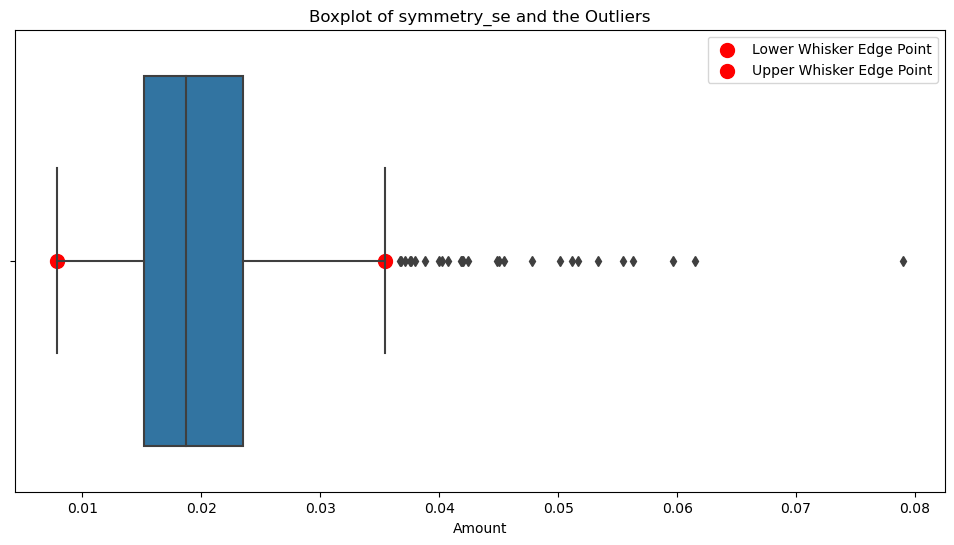

3      0.05963
12     0.04484
22     0.03672
42     0.05333
60     0.04183
63     0.04192
68     0.04197
78     0.07895
119    0.05014
122    0.04547
138    0.05168
146    0.05628
176    0.03880
190    0.05113
192    0.03799
212    0.04783
214    0.04499
290    0.04077
314    0.06146
329    0.04022
332    0.04243
343    0.03756
345    0.03675
351    0.05543
366    0.03710
520    0.03997
553    0.03759
Name: symmetry_se, dtype: float64


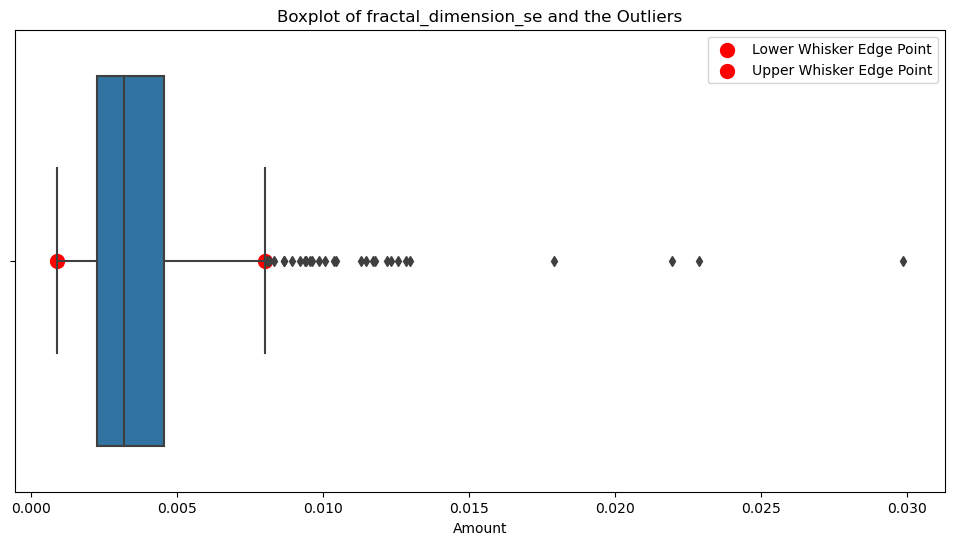

3      0.009208
9      0.010080
12     0.012840
14     0.008093
68     0.009559
71     0.021930
83     0.010390
112    0.012980
122    0.009875
145    0.009423
147    0.009368
151    0.011780
152    0.029840
176    0.017920
190    0.011720
213    0.012560
242    0.008675
257    0.008660
290    0.022860
376    0.012200
388    0.012330
450    0.008925
465    0.008133
468    0.011300
485    0.009627
504    0.010450
505    0.011480
507    0.008313
Name: fractal_dimension_se, dtype: float64


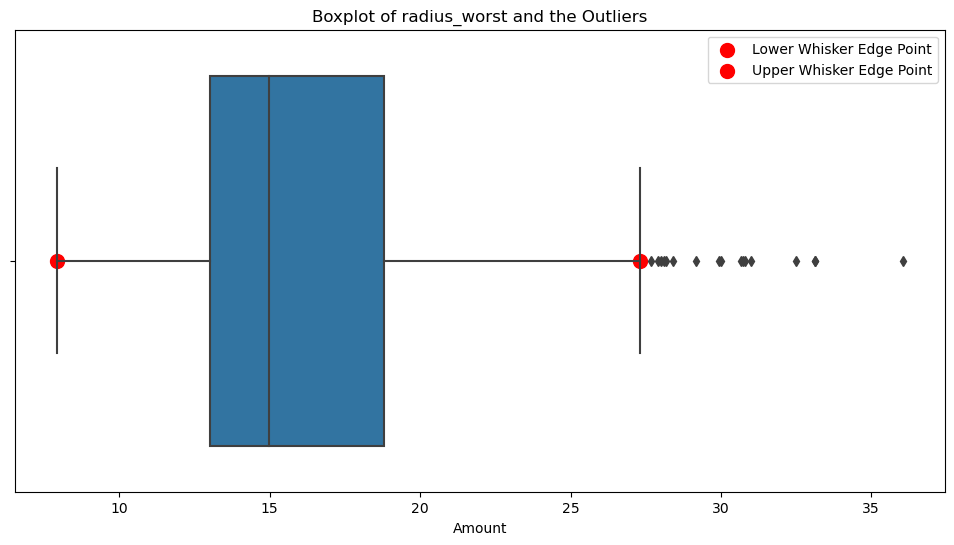

23     29.17
82     30.00
108    28.40
164    28.01
180    33.12
212    28.11
219    27.90
236    31.01
265    32.49
272    28.19
339    30.67
352    33.13
368    30.75
369    27.66
461    36.04
503    30.79
521    29.92
Name: radius_worst, dtype: float64


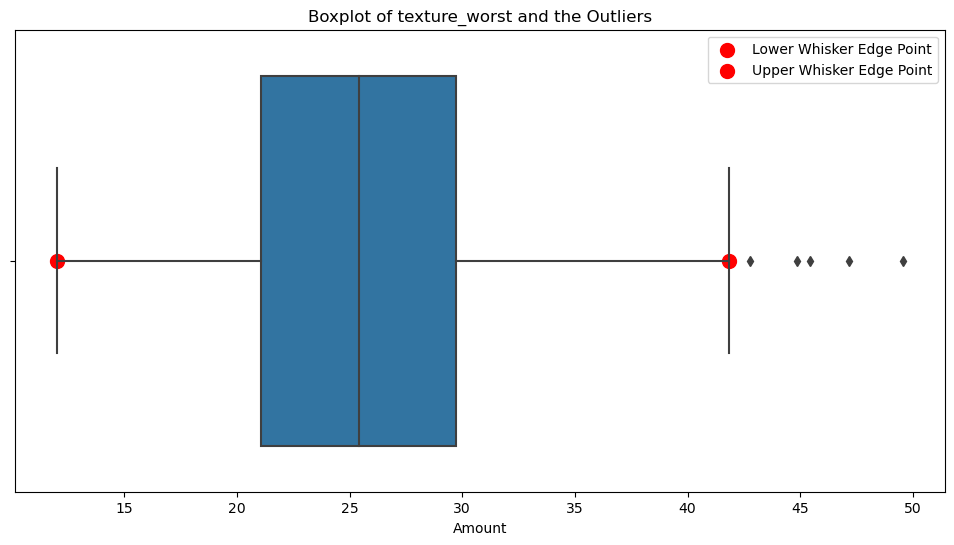

219    45.41
239    44.87
259    49.54
265    47.16
562    42.79
Name: texture_worst, dtype: float64


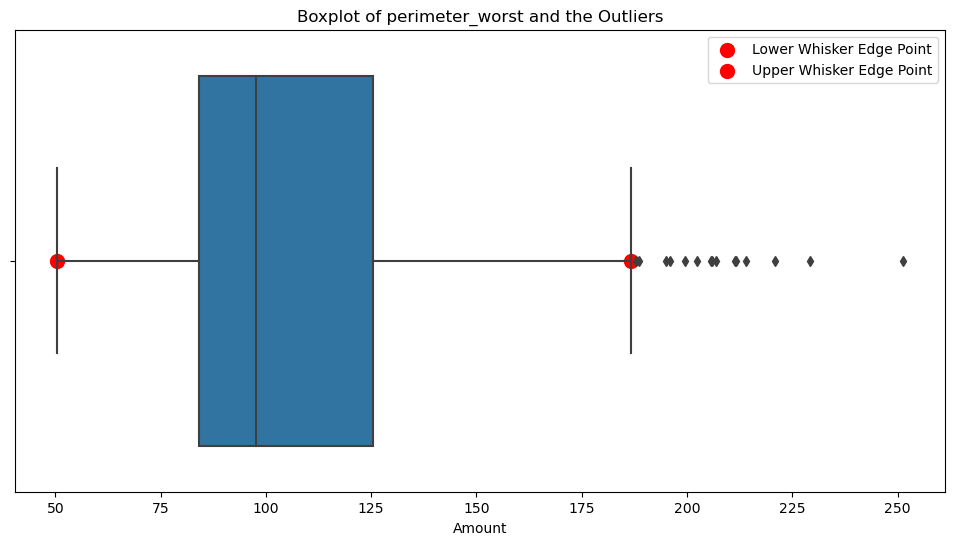

23     188.0
82     211.7
108    206.8
180    220.8
212    188.5
236    206.0
265    214.0
272    195.9
339    202.4
352    229.3
368    199.5
369    195.0
461    251.2
503    211.5
521    205.7
Name: perimeter_worst, dtype: float64


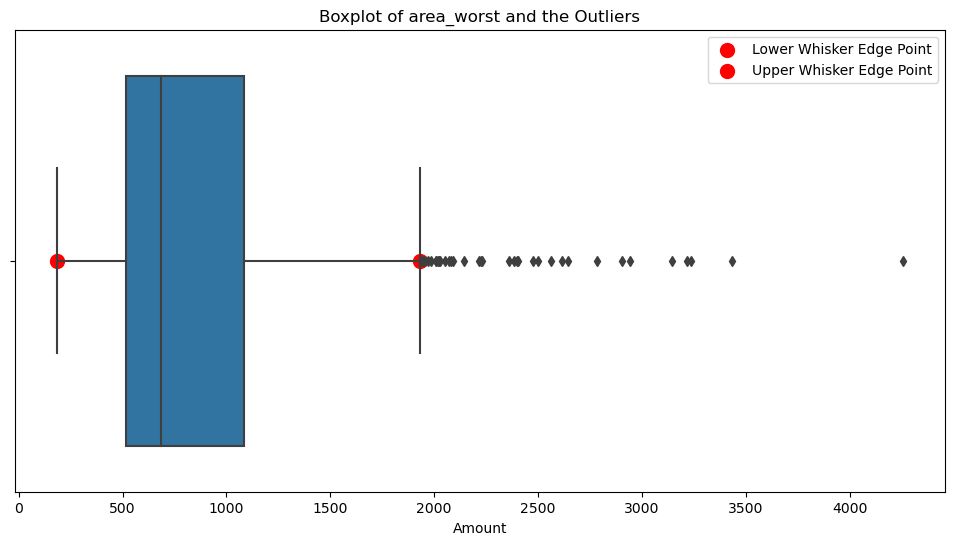

0      2019.0
1      1956.0
18     2398.0
23     2615.0
24     2215.0
56     2145.0
82     2562.0
108    2360.0
122    2073.0
162    2232.0
164    2403.0
180    3216.0
181    2089.0
202    1986.0
212    2499.0
218    2009.0
219    2477.0
236    2944.0
250    2010.0
254    1972.0
265    3432.0
272    2384.0
300    2053.0
323    1938.0
339    2906.0
352    3234.0
368    3143.0
369    2227.0
373    1946.0
393    2081.0
449    2022.0
461    4254.0
503    2782.0
521    2642.0
564    2027.0
Name: area_worst, dtype: float64


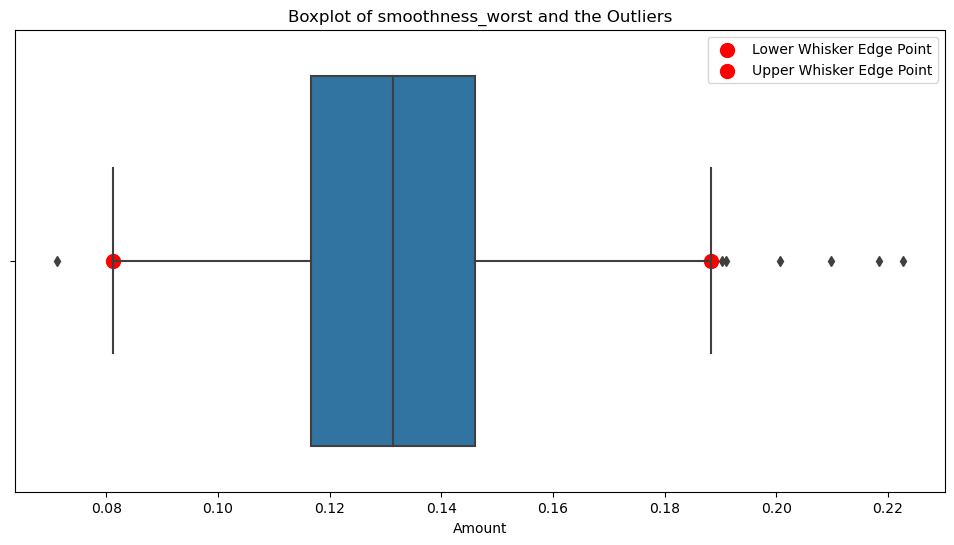

3      0.20980
41     0.19090
192    0.07117
203    0.22260
379    0.21840
504    0.19020
505    0.20060
Name: smoothness_worst, dtype: float64


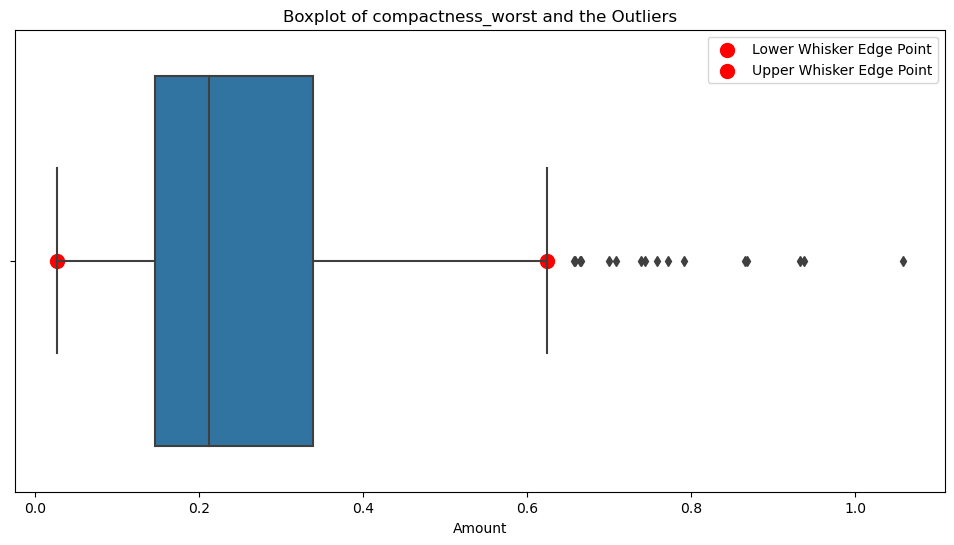

0      0.6656
3      0.8663
9      1.0580
14     0.7725
15     0.6577
26     0.6643
33     0.6590
42     0.7444
72     0.7394
108    0.6997
181    0.7584
190    0.9327
379    0.9379
430    0.7090
562    0.7917
567    0.8681
Name: compactness_worst, dtype: float64


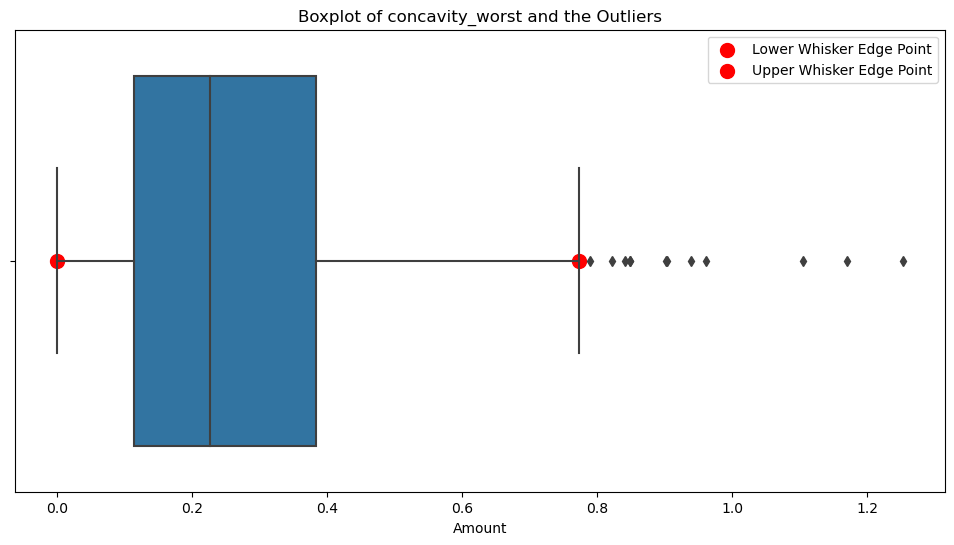

9      1.1050
68     1.2520
108    0.9608
152    0.8216
190    0.8488
202    0.7892
252    0.8489
379    0.8402
400    0.9034
430    0.9019
562    1.1700
567    0.9387
Name: concavity_worst, dtype: float64


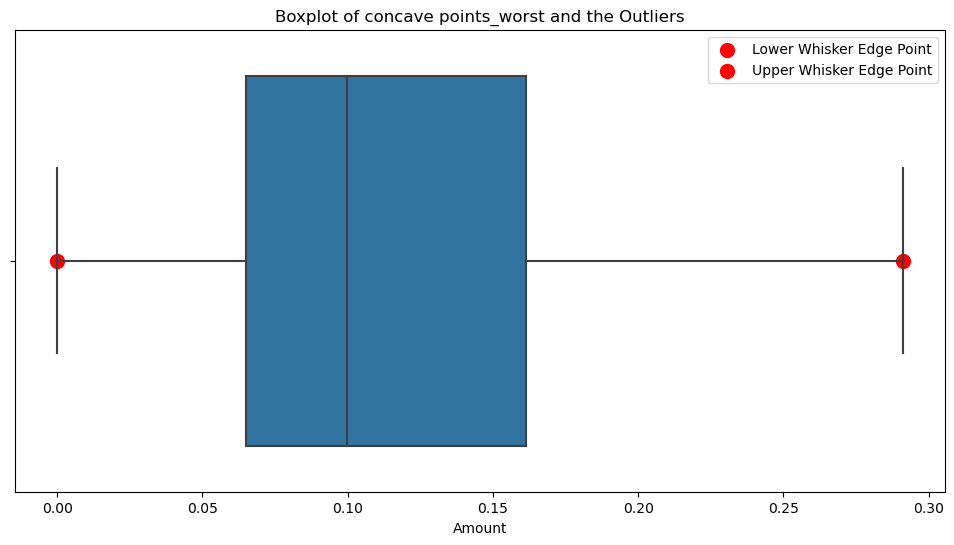

Series([], Name: concave points_worst, dtype: float64)


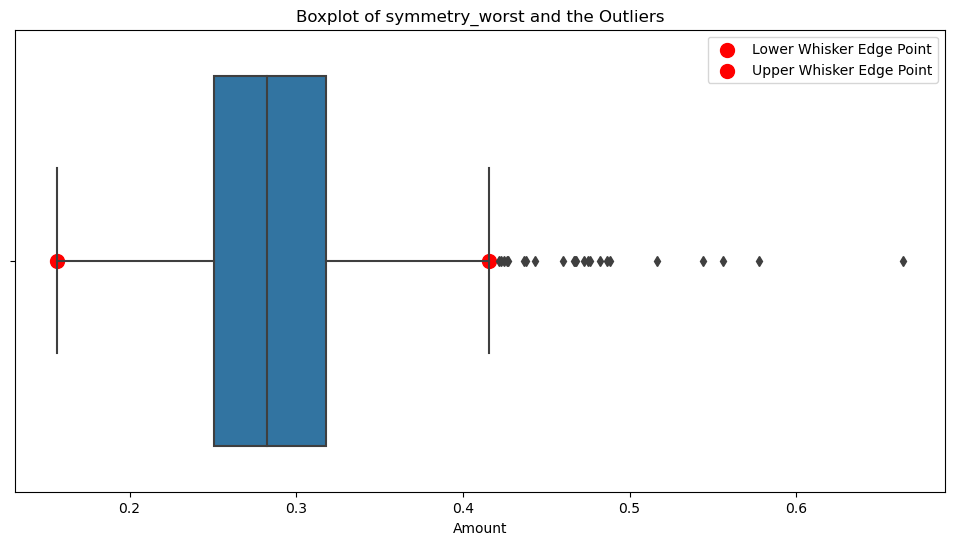

0      0.4601
3      0.6638
8      0.4378
9      0.4366
15     0.4218
22     0.4667
26     0.4264
31     0.4761
34     0.4270
35     0.4863
42     0.4670
68     0.4228
78     0.5440
119    0.4882
146    0.5774
190    0.5166
199    0.4753
203    0.4432
214    0.4724
323    0.5558
351    0.4245
370    0.4824
489    0.4677
Name: symmetry_worst, dtype: float64


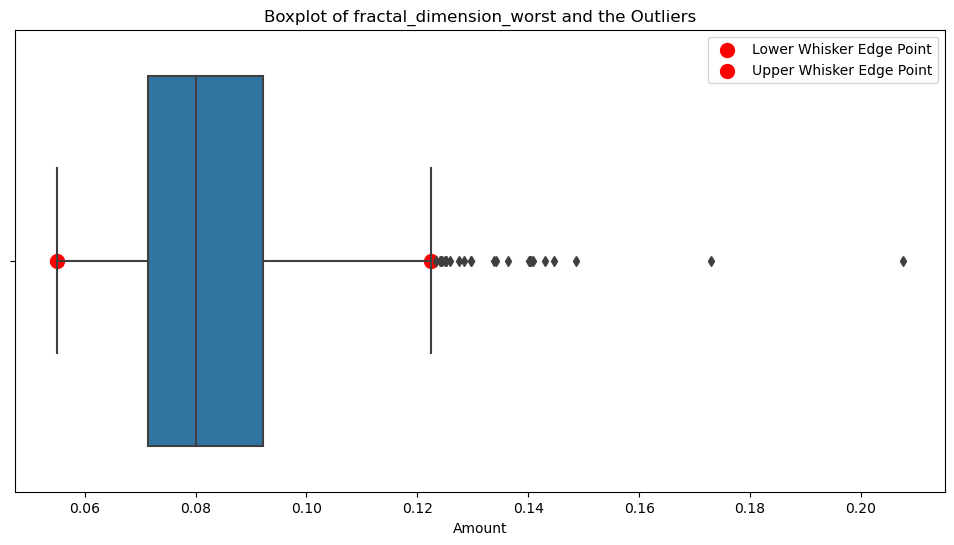

3      0.1730
5      0.1244
9      0.2075
14     0.1431
15     0.1341
26     0.1275
31     0.1402
34     0.1233
72     0.1339
105    0.1405
118    0.1252
151    0.1486
152    0.1259
181    0.1284
190    0.1446
229    0.1243
242    0.1297
252    0.1297
379    0.1403
465    0.1249
504    0.1252
505    0.1364
562    0.1409
567    0.1240
Name: fractal_dimension_worst, dtype: float64


In [8]:
columns_to_visualize = healthcare_df.columns.drop('id')
columns_to_visualize = columns_to_visualize.drop('diagnosis')
outliers_list = []
for column in columns_to_visualize:
    Q1 = healthcare_df[column].quantile(0.25)
    Q3 = healthcare_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    plt.figure(figsize=(12, 6))
    boxplot = sns.boxplot(x=healthcare_df[column], whis=1.5)
    whisker_edge_data = healthcare_df[(healthcare_df[column] >= lower_whisker) & (healthcare_df[column] <= upper_whisker)]
    lower_whisker_point = whisker_edge_data[column].min()
    upper_whisker_point = whisker_edge_data[column].max()
    plt.scatter([lower_whisker_point], [0], color='red', s=100, label='Lower Whisker Edge Point')
    plt.scatter([upper_whisker_point], [0], color='red', s=100, label='Upper Whisker Edge Point')
    plt.legend()
    plt.title(f'Boxplot of {column} and the Outliers')
    plt.xlabel('Amount')
    plt.show()
    outliers = healthcare_df[(healthcare_df[column] < lower_whisker) | (healthcare_df[column] > upper_whisker)]
    # I add outliers to use it outliers handling
    if (not outliers.empty):
        outliers_list.append([column, lower_whisker, upper_whisker])
    print(outliers[column])

In [9]:
# I removed outliers because this is a cancer data and outliers may cause misdirection for patients.
for column_name, lower_whis, upper_whis in outliers_list:
    healthcare_df = healthcare_df[(healthcare_df[column_name] >= lower_whis) & 
                                            (healthcare_df[column_name] <= upper_whis)]

In [10]:
healthcare_df.replace({'M': 1, 'B': 0}, inplace=True)
healthcare_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,84610002,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,846381,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,924934,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,925277,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [11]:
columns_to_visualize = healthcare_df.columns.drop('id')
columns_to_visualize = columns_to_visualize.drop('diagnosis')
for column in columns_to_visualize:
    min_value = healthcare_df[column].min()
    max_value = healthcare_df[column].max()
    healthcare_df[column] = (healthcare_df[column] - min_value) / (max_value - min_value)

healthcare_df    

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,0.828055,0.510945,0.806404,0.762006,0.508308,0.490209,0.442829,0.587768,...,0.898978,0.548387,0.886197,0.842305,0.590802,0.387182,0.489711,0.759733,0.545842,0.436055
7,84458202,1,0.494452,0.553234,0.493671,0.369231,0.892388,0.793786,0.368016,0.475377,...,0.549008,0.565217,0.518924,0.421982,0.789770,0.578969,0.346577,0.611876,0.602559,0.917292
10,845636,1,0.664193,0.673134,0.626635,0.556141,0.309384,0.258779,0.129627,0.263940,...,0.677090,0.766480,0.632727,0.571971,0.345847,0.209440,0.188818,0.392253,0.496802,0.448920
11,84610002,1,0.646557,0.406965,0.636209,0.541861,0.547397,0.600700,0.391120,0.524702,...,0.751052,0.535063,0.742219,0.660304,0.547630,0.913123,0.513136,0.711758,0.856716,0.759534
13,846381,1,0.651701,0.708458,0.637273,0.543306,0.340244,0.442074,0.390491,0.426052,...,0.535779,0.548387,0.530994,0.409829,0.298921,0.274121,0.300505,0.440031,0.437527,0.117323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,0,0.433463,0.955721,0.411765,0.315172,0.296249,0.212559,0.243418,0.186100,...,0.358388,0.831697,0.331322,0.243360,0.389019,0.221405,0.315646,0.255328,0.251173,0.263593
555,924934,0,0.243148,0.890547,0.232741,0.151211,0.439785,0.312876,0.235717,0.217474,...,0.174985,0.802595,0.165187,0.102205,0.536368,0.237012,0.258833,0.358907,0.188913,0.423036
558,925277,0,0.559115,0.645274,0.559515,0.436549,0.351638,0.621486,0.404322,0.296743,...,0.453999,0.534712,0.478403,0.325053,0.200375,0.490359,0.473923,0.434526,0.202559,0.380303
560,925292,0,0.519436,0.867662,0.506223,0.388355,0.582054,0.509900,0.175324,0.341859,...,0.443175,0.741585,0.429261,0.309165,0.402159,0.333079,0.171606,0.412112,0.199147,0.428856


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


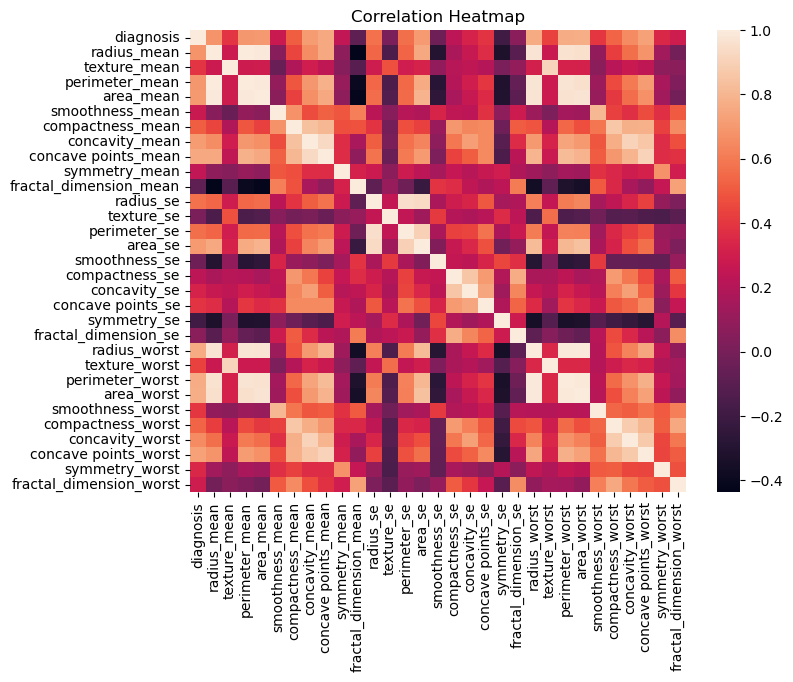

In [12]:
healthcare_sub_df = healthcare_df.drop(columns = 'id')
correlation_matrix = healthcare_sub_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)

plt.title('Correlation Heatmap')

plt.show()

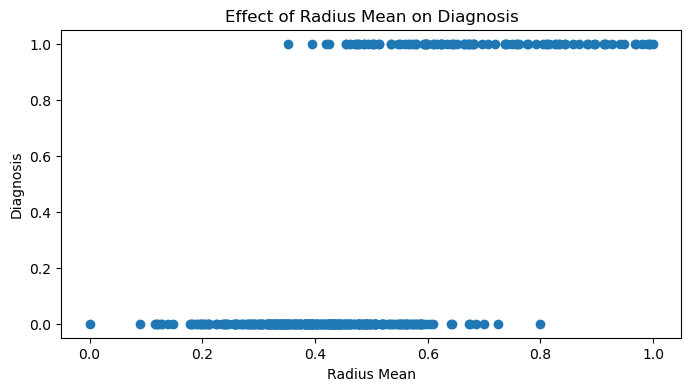

In [13]:
# Maybe logistic regression can be used for this data.
plt.figure(figsize=(8, 4))
plt.scatter(healthcare_df['radius_mean'], healthcare_df['diagnosis'])
plt.title('Effect of Radius Mean on Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel("Diagnosis")
plt.show()

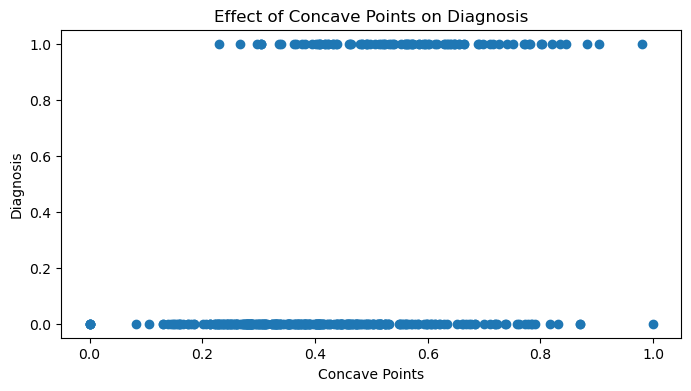

In [14]:
plt.figure(figsize=(8, 4))
plt.scatter(healthcare_df['concave points_se'], healthcare_df['diagnosis'])
plt.title('Effect of Concave Points on Diagnosis')
plt.xlabel('Concave Points')
plt.ylabel("Diagnosis")
plt.show()

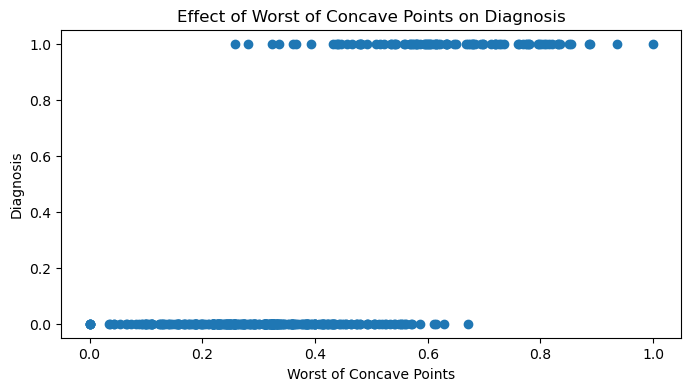

In [15]:
plt.figure(figsize=(8, 4))
plt.scatter(healthcare_df['concave points_worst'], healthcare_df['diagnosis'])
plt.title('Effect of Worst of Concave Points on Diagnosis')
plt.xlabel('Worst of Concave Points')
plt.ylabel("Diagnosis")
plt.show()

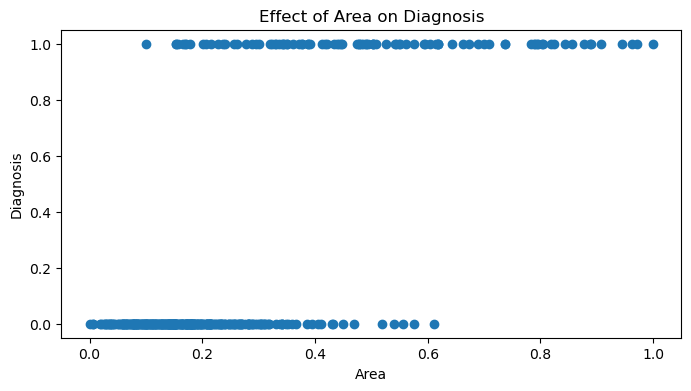

In [16]:
plt.figure(figsize=(8, 4))
plt.scatter(healthcare_df['area_se'], healthcare_df['diagnosis'])
plt.title('Effect of Area on Diagnosis')
plt.xlabel('Area')
plt.ylabel("Diagnosis")
plt.show()

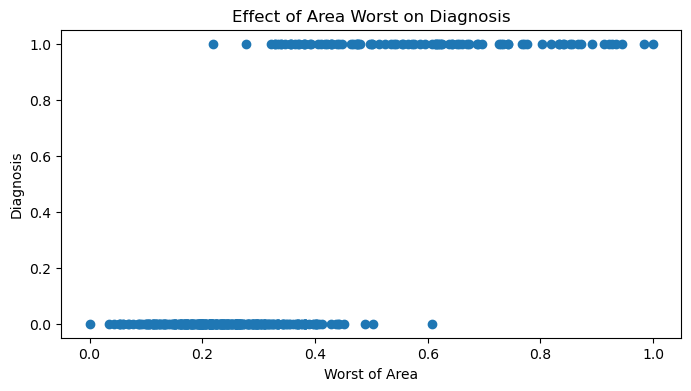

In [17]:
plt.figure(figsize=(8, 4))
plt.scatter(healthcare_df['area_worst'], healthcare_df['diagnosis'])
plt.title('Effect of Area Worst on Diagnosis')
plt.xlabel('Worst of Area')
plt.ylabel("Diagnosis")
plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [18]:
shuffled_df = healthcare_df.drop(columns='id')
shuffled_df = healthcare_df.sample(frac=1, random_state=13)

X = shuffled_df.drop('diagnosis', axis=1)
y = shuffled_df['diagnosis']

length_of_data = len(shuffled_df)
train_size = int(0.7 * length_of_data)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

Optimal k value for p=1: 2, Minkowski Distance: 27.0
Optimal k value for p=2: 2, Minkowski Distance: 5.291502622129181
Optimal k value for p=3: 2, Minkowski Distance: 3.0365889718756622


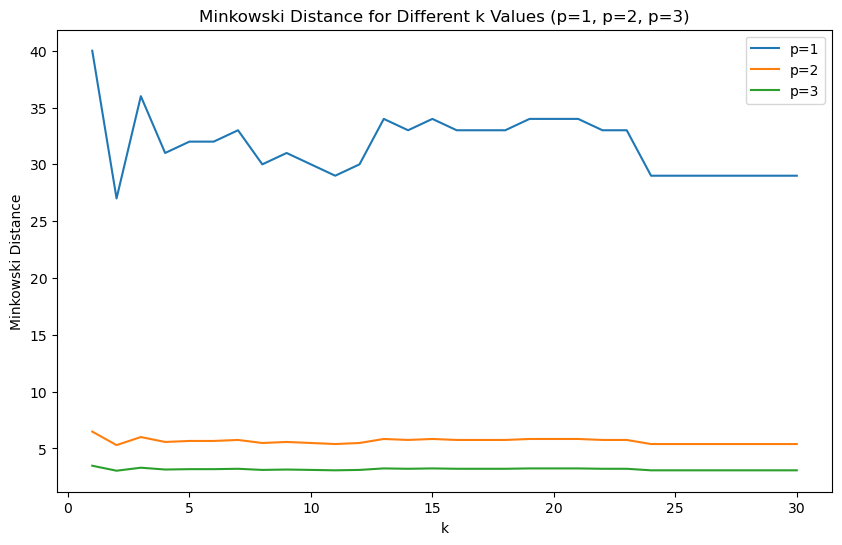

In [47]:
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(1, 31))
p1 = []
p2 = []
p3 = []

for k in k_values:
    knn_p1 = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_p1.fit(X_train, y_train)
    predictions_p1 = knn_p1.predict(X_test)
    
    knn_p2 = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_p2.fit(X_train, y_train)
    predictions_p2 = knn_p2.predict(X_test)
    
    knn_p3 = KNeighborsClassifier(n_neighbors=k, p=3)
    knn_p3.fit(X_train, y_train)
    predictions_p3 = knn_p3.predict(X_test)
    
    distancep1 = ((((y_test - predictions_p1).abs())**1).sum())**(1/1)
    distancep2 = ((((y_test - predictions_p2).abs())**2).sum())**(1/2)
    distancep3 = ((((y_test - predictions_p3).abs())**3).sum())**(1/3)
    
    p1.append(distancep1)
    p2.append(distancep2)
    p3.append(distancep3)
    
    accuracy_p1 = knn_p1.score(X_test, y_test)
    accuracy_p2 = knn_p2.score(X_test, y_test)
    accuracy_p3 = knn_p3.score(X_test, y_test)
        
min_index_p1 = np.argmin(p1)
min_index_p2 = np.argmin(p2)
min_index_p3 = np.argmin(p3)
print(f"Optimal k value for p=1: {k_values[min_index_p1]}, Minkowski Distance: {p1[min_index_p1]}")
print(f"Optimal k value for p=2: {k_values[min_index_p2]}, Minkowski Distance: {p2[min_index_p2]}")
print(f"Optimal k value for p=3: {k_values[min_index_p3]}, Minkowski Distance: {p3[min_index_p3]}")

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, p1, label='p=1')
plt.plot(k_values, p2, label='p=2')
plt.plot(k_values, p3, label='p=3')
plt.xlabel('k')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance for Different k Values (p=1, p=2, p=3)')
plt.legend()
plt.show()

optimal_k = min([k_values[min_index_p1], k_values[min_index_p2], k_values[min_index_p3]])
p = np.argmin([accuracy_p1, accuracy_p2, accuracy_p3])
knn = KNeighborsClassifier(n_neighbors=optimal_k, p= p + 1)
knn.fit(X_train, y_train)

### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.75


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

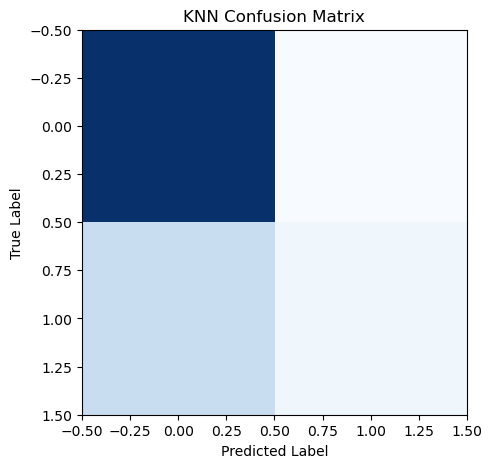

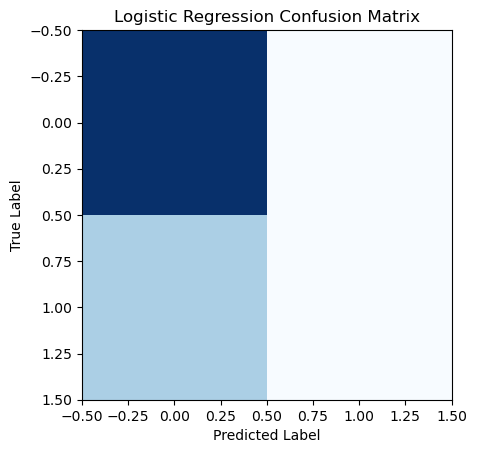

KNN Metrics:
Accuracy:  0.775
Precision:  0.7508340283569642
Recall:  0.775
F1-score:  0.7336070596886874

Logistic Regression Metrics:
Accuracy:  0.75
Precision:  0.8125
Recall:  0.75
F1-score:  0.6428571428571428


In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


knn_predictions = knn.predict(X_test)
lr_predictions = lr.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Precision
knn_precision = precision_score(y_test, knn_predictions, average='weighted', zero_division=1)
lr_precision = precision_score(y_test, lr_predictions, average='weighted', zero_division=1)

# Recall
knn_recall = recall_score(y_test, knn_predictions, average='weighted', zero_division=1)
lr_recall = recall_score(y_test, lr_predictions, average='weighted', zero_division=1)

# F1-score
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted', zero_division=1)
lr_f1_score = f1_score(y_test, lr_predictions, average='weighted', zero_division=1)


plt.figure(figsize=(10, 5))
# KNN Confusion Matrix
plt.imshow(knn_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Logistic Regression Confusion Matrix
plt.imshow(logreg_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

print("KNN Metrics:")
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1-score: ", knn_f1_score)

print("\nLogistic Regression Metrics:")
print("Accuracy: ", lr_accuracy)
print("Precision: ", lr_precision)
print("Recall: ", lr_recall)
print("F1-score: ", lr_f1_score)

### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

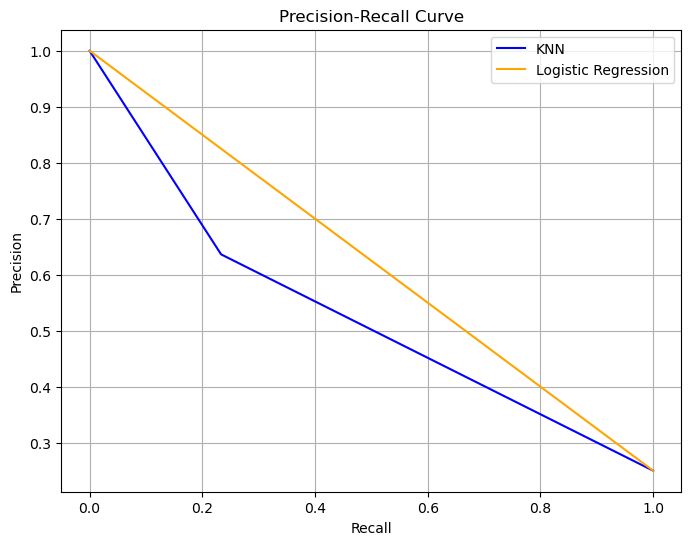

In [62]:
from sklearn.metrics import precision_recall_curve

knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_predictions)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_predictions)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))

plt.plot(knn_recall, knn_precision, label='KNN', color='blue')

plt.plot(lr_recall, lr_precision, label='Logistic Regression', color='orange')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

In [ ]:
## I chose metric which is where precision is a little greater 
## because for cancer detection precision is more important for patients. 
## Also, I chose logistic regression model because it has greater AUC (Area Under the Curve) and this means it is better. 